In [2204]:
!pip install p3_data

In [2205]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
import seaborn as sns
import json
from io import StringIO
import importlib

In [2206]:
import p3_data
from p3_data import (glob_file_list, load_json_from_file, merge_dicts, plot_groups, 
    get_varying_column_names, filter_dataframe, take_varying_columns,
    load_json_records_as_dataframe)

In [3252]:
# Load result files from P3 Test Driver
src_files = []

# Pulsar 2.6.0 ecs s3 tier2 07.07.2020

## attempt1 brokers out of direct memory
#src_files += ['../../../../../tests/Pulsar-ecs-s3-tier2-Redhook/Pulsar-2.6.0-tier2-ecs-s3-07.07.2020-10k-16p-18tests-attempt1-broker-outofdirectmem/data/p3_test_driver/results/*.json']

## attempt2 bookies out of direct memory
#src_files += ['../../../../../tests/Pulsar-ecs-s3-tier2-Redhook/pulsar-2.6.0-tier2-ecs-s3-07.07.2020-10k-16p-19tests-attempt2-bk-outofdirectmem/data/p3_test_driver/results/*.json']

## attempt3 broker out of direct memory
#src_files += ['../../../../../tests/Pulsar-ecs-s3-tier2-Redhook/pulsar-2.6.0-tier2-ecs-s3-07.07.2020-10k-16p-19tests-attempt3-broker-directmemOOM/data/p3_test_driver/results/*.json']
#src_files += ['../../../../../tests/Pulsar-ecs-s3-tier2-Redhook/pulsar-2.6.0-tier2-ecs-s3-07.07.2020-10k-16p-19tests-attempt3-broker-directmemOOM/data/p3_test_driver/results_cleared/*.json']

# Pulsar 2.6.0 ecs s3 tier2 07.07.2020
## attempt4 broker out of direct memory - 52 tests
###src_files += ['../../../../../tests/Pulsar-ecs-s3-tier2-Redhook/pulsar-2.6.0-tier2-ecs-s3-07.07.2020-10k-16p-52tests-attempt4/data/p3_test_driver/results_cleared/*.json']

#################s pulsar-2.6.0-no-tiered-10.07.2020-46tests-success
src_files += ['../../../../../tests/Pulsar-ecs-s3-tier2-Redhook/pulsar-2.6.0-no-tiered-10.07.2020-46tests-success/data/p3_test_driver/results_cleared/*.json']
#---------------------------------------------------------

### Pulsar 2.5.2 15.06.2020 44 tests different amount of workers
# src_files += ['../../../../../tests/pulsar_2.5.2_44_tests_15.06/data/p3_test_driver/results/*.json']

### Pulsar 2.5.2 17.06.2020 44 tests different amount of workers
#src_files += ['../../../../../tests/Pulsar-2.5.2-17.06.20-44tests/data/p3_test_driver/results_cleared/*.json']

#-------------------------------------------------------------------------
############## Pulsar fresh tests 2.5.2 
src_files += ['../../../../../tests/Pulsar-ecs-s3-tier2-Redhook/Pulsar-2.5.2-no_tier2_11.07.2020/pulsar-2.5.2-10k_1p_16p_100b_1p_no_tier2_47tests-11.07.2020/data/p3_test_driver/results/*.json']



# Pravega 0.8.0-2577.15b0f5eb9 tier2 29.06.2020
#src_files += ['../../../../tests/pravega-15b0f5eb9-tier2-29.06.2020-10k-100b/pravega-0.8.0-2577.15b0f5eb9-tier2-10k-28tests-29.06.2020/data/p3_test_driver/results/*.json']

# pravega-0.8.0-2656.1c40f1e-no_netty_Isilon-nfs-tier2 09.07.2020 48 tests success
src_files += ['../../../../../tests/Pravega-1c40f1e-NO_NETTY-nfs-Isilon-tier2-48tests-succsess-09.07.2020/data/p3_test_driver/results/*.json']

### PRAVEGA 15b0f5eb9 (master) Isilon nfs omb 2b28b32 (no_netty) 09.07.2020 48tests success
src_files += ['../../../../../tests/PRAVEGA-15b0f5eb9-Isilon-nfs-omb-2b28b32-09.07.2020-48tests/data/p3_test_driver/results/*.json']

###### PRAVEGA 15b0f5eb9 (master) omb 2b28b32 (no_netty) ECS S3 tier2 13.07.2020
# 10k 1p
src_files += ['../../../../../tests/PRAVEGA-15b0f5eb9-2b28b32-ECS-tier2-13.07.2020/10k-1p/data/p3_test_driver/results/*.json']
#src_files += ['../../../../../tests/PRAVEGA-15b0f5eb9-2b28b32-ECS-tier2-13.07.2020/10k-1p/data/p3_test_driver/results_cleared/*.json']
# 10k 16p and 100b 1p 16p
src_files += ['../../../../../tests/PRAVEGA-15b0f5eb9-2b28b32-ECS-tier2-13.07.2020/10k-16p-100b/data/p3_test_driver/results/*.json']

### pravega-15b0f5eb9-2b28b32-ECS-tier2-13-Jul_2020 night tests 100b 22 tests
src_files += ['../../../../../tests/PRAVEGA-15b0f5eb9-2b28b32-ECS-tier2-13.07.2020-night-tests/data/p3_test_driver/results/*.json']

############ PRavega 0.8.0-2588.326fc55a2 ECS S3 commit from 14 July with no_netty client 100b 16p low rates tests
# /tmp/Pravega-326fc55a2-client-2b28b32-ECS-S3-tier2-15.07.2020-100b-16p-low-rates.zip
src_files += ['../../../../../tests/Pravega-326fc55a2-client-2b28b32-ECS-S3-tier2-15.07.2020-100b-16p-low-rates/data/p3_test_driver/results/*.json']

# PRavega 0.8.0-2588.326fc55a2 with client 326fc55a2 ECS S3 tier2
src_files += ['../../../../../tests/Pravega-326fc55a2-client-326fc55a2-100b-16p-low-rates-15.07.2020/data/p3_test_driver/results/*.json']

raw_df = load_json_records_as_dataframe(src=src_files, ignore_error=True)


Loading records from 278 files...


In [3253]:
# Clean raw results
def clean_result(result):
    try:
        r = result.copy()
        r['utc_begin'] = pd.to_datetime(r['utc_begin'], utc=True)
        r['utc_end'] = pd.to_datetime(r['utc_end'], utc=True)
        r['git_commit'] = r['git_commit'].split(' ')[0]
        r['driverName'] = r['driver']['name']
        if r['driverName'] == 'Pulsar':
            r = merge_dicts(r, r['driver']['client']['persistence'])
        r = merge_dicts(r, r['workload'])
        del r['workload']
        r = merge_dicts(r, r['omb_results'])
        if 'ansible_vars' in r and isinstance(r['ansible_vars'], dict):
            r = merge_dicts(r, r['ansible_vars'])
        if r['driverName'] == 'Pravega':
            if 'pravegaVersion' not in r:
                r['pravegaVersion'] = '1c40f1e-no_netty_Isilon-nfs-tier2'
            r['pravegaVersion'] = r['pravegaVersion'].replace('-SNAPSHOT','')
        for k in list(r.keys()):
            if 'Quantiles' in k:
                r[k] = pd.Series(data=[float(q) for q in r[k].keys()], index=list(r[k].values())).sort_index() / 100
            elif isinstance(r[k], list) and 'Rate' in k:
                r[k] = pd.Series(r[k])
                r['%sMean' % k] = r[k].mean()
        r['numWorkloadWorkers'] = int(r.get('numWorkers', 0))
        r['throttleEventsPerSec'] = r['producerRate']
        r['publishRateEventsPerSecMean'] = r['publishRateMean']
        r['consumeRateEventsPerSecMean'] = r['consumeRateMean']
        r['publishRateMBPerSecMean'] = r['publishRateMean'] * r['messageSize'] * 1e-6
        r['consumeRateMBPerSecMean'] = r['consumeRateMean'] * r['messageSize'] * 1e-6
        r['publishLatencyMsAvg'] = r['aggregatedPublishLatencyAvg']
        r['publishLatencyMs50Pct'] = r['aggregatedPublishLatency50pct']
        r['publishLatencyMs99Pct'] = r['aggregatedPublishLatency99pct']
        r['endToEndLatencyMsAvg'] = r['aggregatedEndToEndLatencyAvg']
        r['endToEndLatencyMs50Pct'] = r['aggregatedEndToEndLatency50pct']
        r['endToEndLatencyMs99Pct'] = r['aggregatedEndToEndLatency99pct']
        
        if r['driverName'] == 'Pulsar':
            r['version'] = r['pulsarVersion']
            
        if r['driverName'] == 'Pravega':    
            r['version'] = r['pravegaVersion']   
        
        return pd.Series(r)
    except Exception as e:
        print('ERROR: %s: %s' % (r['test_uuid'], e))
        # raise e

In [3254]:
# r = clean_result(raw_df.iloc[-1])
# pd.DataFrame(r)

In [3255]:
clean_df = raw_df.apply(clean_result, axis=1)
clean_df = clean_df.set_index('test_uuid', drop=False)
clean_df = clean_df[clean_df.error==False]
clean_df = clean_df.sort_values(['utc_begin'])

In [3256]:
# Show list of columns
clean_df.columns.values

array(['ackQuorum', 'aggregatedEndToEndLatency50pct',
       'aggregatedEndToEndLatency75pct', 'aggregatedEndToEndLatency95pct',
       'aggregatedEndToEndLatency9999pct',
       'aggregatedEndToEndLatency999pct',
       'aggregatedEndToEndLatency99pct', 'aggregatedEndToEndLatencyAvg',
       'aggregatedEndToEndLatencyMax',
       'aggregatedEndToEndLatencyQuantiles',
       'aggregatedPublishLatency50pct', 'aggregatedPublishLatency75pct',
       'aggregatedPublishLatency95pct', 'aggregatedPublishLatency9999pct',
       'aggregatedPublishLatency999pct', 'aggregatedPublishLatency99pct',
       'aggregatedPublishLatencyAvg', 'aggregatedPublishLatencyMax',
       'aggregatedPublishLatencyQuantiles', 'ansible', 'ansible_vars',
       'aws-ec2', 'backlog', 'bookkeeperVersion', 'build',
       'command_timed_out', 'consumeRate', 'consumeRateEventsPerSecMean',
       'consumeRateMBPerSecMean', 'consumeRateMean',
       'consumerBacklogSizeGB', 'consumerPerSubscription',
       'deduplicationE

In [3257]:
# Define columns that identify test parameters
param_cols = [
    'numWorkloadWorkers',
    'topics',
    'partitionsPerTopic',
    'producersPerTopic',
    'subscriptionsPerTopic',
    'consumerPerSubscription',
    'testDurationMinutes',
    'keyDistributor',
    'git_commit',
    'driverName',
    'version'
]

In [3258]:
# Define columns that are the output of the experiments
output_cols = [
    'publishRateEventsPerSecMean',
    'consumeRateEventsPerSecMean',
    'consumeRateMBPerSecMean',
    'publishRateMBPerSecMean',
    'publishLatencyMs50Pct',
    'publishLatencyMs99Pct',
    'endToEndLatencyMs50Pct',
    'endToEndLatencyMs99Pct',
    'throttleEventsPerSec',
    'utc_begin',    
]

In [3259]:
cols = param_cols + output_cols

In [3260]:
# View most recent results
clean_df[cols].tail(38).T

test_uuid,f7213a72-fdcd-4e52-8fab-fc96f26fc9d7,6fab67ed-3a32-4b33-b110-8b39bc47b54d,5c0aeb62-1340-40ac-ad6f-d3f6e8c58531,3b7e2081-32ac-4a32-bfb9-be44bc0f4524,3f2141fb-a13a-4207-b2e8-e930afd9e156,28dd4673-4145-47a9-832b-009020590a32,540298fb-e99d-4ba7-97b1-4f87c942fcf4,05f06902-d5a2-4482-a972-bffa77821cac,b9d36eb2-0596-45b4-a092-6c538ba20a51,8030d69b-2744-4506-8331-8563a3943d10,...,c638ca03-1d81-4c7e-93e4-78c2b9eede40,3eedd0f1-ef0d-4f92-a28c-173202d4f92b,ba8937e0-f10d-4fd0-a4c3-d0dece3a2fb7,efc32284-8fde-4a77-abdb-1485a0bae888,76b717e7-1636-433d-890c-094797f21701,6561cd30-0a0b-4e86-9cdd-64b507391fbb,d2e62b28-0a8d-450d-8f30-5daa1c7aba79,8fdb6155-a226-4f39-b27a-40e32d7b7de5,b2e041f0-f746-43c1-a365-cd7191a88e20,8f0ec119-fb03-4905-a907-ce83c01e5d48
numWorkloadWorkers,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
topics,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
partitionsPerTopic,1,1,1,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
producersPerTopic,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
subscriptionsPerTopic,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
consumerPerSubscription,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
testDurationMinutes,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
keyDistributor,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY,...,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY,NO_KEY
git_commit,3a015ff,3a015ff,3a015ff,3a015ff,3a015ff,3a015ff,3a015ff,3a015ff,3a015ff,3a015ff,...,245d863,245d863,245d863,245d863,245d863,245d863,245d863,245d863,245d863,245d863
driverName,Pravega,Pravega,Pravega,Pravega,Pravega,Pravega,Pravega,Pravega,Pravega,Pravega,...,Pravega,Pravega,Pravega,Pravega,Pravega,Pravega,Pravega,Pravega,Pravega,Pravega


In [3261]:
# Export to CSV
#clean_df[cols].to_csv('openmessaging-benchmark-results.csv')

In [3262]:
# df = clean_df[cols]
# df = df.sort_values(['messageSize','numWorkloadWorkers','producersPerTopic','throttleEventsPerSec','utc_begin'])
# df.head()

## Product versions

In [3263]:
# View distinct values of pravegaVersion and test counts
clean_df.groupby(['version']).size()

version
0.8.0-2656.15b0f5eb9-no_netty-client-Isilon-tier2    48
0.8.0-2656.1c40f1e-Isilon-tier2                      48
15b0f5eb9-no_netty-2b28b32-ECS-S3-tier2              47
15b0f5eb9-no_netty-2b28b32-ECS-S3-tier2-test2        22
2.5.2                                                46
2.6.0-not-tiered                                     43
326fc55a2-client-326fc55a2-ECS-S3-tier2              12
326fc55a2-no_netty-2b28b32-ECS-S3-tier2              12
dtype: int64

In [3264]:
# First level of filtering
filt_df = filter_dataframe(
    clean_df,
    #version='2.6.0-not-tiered',
    #driverName='Pulsar',
    #pulsarVersion='2.5.2',
    #pravegaVersion='0.8.0-2656.15b0f5eb9-no_netty-client-Isilon-tier2',
    numWorkloadWorkers=4, 
    topics=4,
    testDurationMinutes=2,
   # size_of_test_batch=(2,1000), # between
   # aggregatedEndToEndLatency50pct=(1,1e6),
)
# filt_df = filt_df[filt_df.size_of_test_batch > 1]
len(filt_df)

278

In [3265]:
def latency_vs_publish_throughput_table(df):
    result_df = (df
        .set_index(['publishRateMBPerSecMean'])
        .sort_index()
        [[
            'aggregatedPublishLatency50pct',
            'aggregatedPublishLatency95pct',
            'aggregatedPublishLatency99pct',
            'aggregatedEndToEndLatency50pct',
            'aggregatedEndToEndLatency95pct',
            'aggregatedEndToEndLatency99pct',
            'test_uuid',
        ]]
        .rename(columns=dict(
            aggregatedPublishLatency50pct='Publish Latency p50',
            aggregatedPublishLatency95pct='Publish Latency p95',
            aggregatedPublishLatency99pct='Publish Latency p99',
            aggregatedEndToEndLatency50pct='E2E Latency p50',
            aggregatedEndToEndLatency95pct='E2E Latency p95',
            aggregatedEndToEndLatency99pct='E2E Latency p99',
        ))
        )
    result_df.index.name = 'Achieved Publish Throughput (MB/s)'
    return result_df

In [3266]:
def latency_vs_consume_throughput_table(df):
    result_df = (df
        .set_index(['consumeRateMBPerSecMean'])
        .sort_index()
        [[
            'aggregatedPublishLatency50pct',
            'aggregatedPublishLatency95pct',
            'aggregatedPublishLatency99pct',
            'aggregatedEndToEndLatency50pct',
            'aggregatedEndToEndLatency95pct',
            'aggregatedEndToEndLatency99pct',
            'test_uuid',
        ]]
        .rename(columns=dict(
            aggregatedPublishLatency50pct='Publish Latency p50',
            aggregatedPublishLatency95pct='Publish Latency p95',
            aggregatedPublishLatency99pct='Publish Latency p99',
            aggregatedEndToEndLatency50pct='E2E Latency p50',
            aggregatedEndToEndLatency95pct='E2E Latency p95',
            aggregatedEndToEndLatency99pct='E2E Latency p99',
        ))
        )
    result_df.index.name = 'Achieved Consume Throughput (MB/s)'
    return result_df

In [3267]:
def latency_vs_provided_rate_table(df):
    result_df = (df
        .set_index(['throttleEventsPerSec'])
        .sort_index()
        [[
            'aggregatedPublishLatency50pct',
            'aggregatedPublishLatency95pct',
            'aggregatedPublishLatency99pct',
            'aggregatedEndToEndLatency50pct',
            'aggregatedEndToEndLatency95pct',
            'aggregatedEndToEndLatency99pct',
            'test_uuid',
        ]]
        .rename(columns=dict(
            aggregatedPublishLatency50pct='Publish Latency p50',
            aggregatedPublishLatency95pct='Publish Latency p95',
            aggregatedPublishLatency99pct='Publish Latency p99',
            aggregatedEndToEndLatency50pct='E2E Latency p50',
            aggregatedEndToEndLatency95pct='E2E Latency p95',
            aggregatedEndToEndLatency99pct='E2E Latency p99',
        ))
        )
    result_df.index.name = 'Throttle Events Per Second'
    return result_df

In [3268]:
def plot_latency_vs_consume_throughput(df):
    assert len(df.messageSize.drop_duplicates().values) == 1
    messageSize = df.messageSize.iloc[0]
    partitionsPerTopic = df.partitionsPerTopic.iloc[0]
    testDurationMinutes = df.testDurationMinutes.iloc[0]
    topics = df.topics.iloc[0]
    producersPerTopic = df.producersPerTopic.iloc[0]
    consumerPerSubscription = df.consumerPerSubscription.iloc[0]
    version = df.version.iloc[0]
    driver = df.driver.iloc[0]
    plot_df = latency_vs_consume_throughput_table(df)
    title = '%s %s , message Size %d, partitions: %d producersPerTopic: %d consumerPerSubscription: %d topics: %d  %dmin test' % (driver, version, messageSize, partitionsPerTopic, producersPerTopic, consumerPerSubscription, topics, testDurationMinutes)
    ax = plot_df.plot(
        logx=True, 
        logy=True,
        figsize=(10,8),
        grid=True, 
        title=title, 
        style=['x:b','x-.b','x-b','+:r','+-.r','+-r'])
    ax.set_ylabel('Latency (ms)');
    tick_formatter = matplotlib.ticker.LogFormatter()
    ax.xaxis.set_major_formatter(tick_formatter)
    ax.yaxis.set_major_formatter(tick_formatter)
    ax.grid('on', which='both', axis='both')

In [3269]:
def plot_latency_vs_publish_throughput(df):
    assert len(df.messageSize.drop_duplicates().values) == 1
    messageSize = df.messageSize.iloc[0]
    partitionsPerTopic = df.partitionsPerTopic.iloc[0]
    testDurationMinutes = df.testDurationMinutes.iloc[0]
    topics = df.topics.iloc[0]
    producersPerTopic = df.producersPerTopic.iloc[0]
    consumerPerSubscription = df.consumerPerSubscription.iloc[0]
    version = df.version.iloc[0]
    driver = df.driver.iloc[0]
    plot_df = latency_vs_publish_throughput_table(df)
    title = '%s %s , message Size %d, partitions: %d producersPerTopic: %d consumerPerSubscription: %d topics: %d  %dmin test' % (driver, version, messageSize, partitionsPerTopic, producersPerTopic, consumerPerSubscription, topics, testDurationMinutes)
    ax = plot_df.plot(
        logx=True, 
        logy=True,
        figsize=(10,8),
        grid=True, 
        title=title, 
        style=['x:b','x-.b','x-b','+:r','+-.r','+-r'])
    ax.set_ylabel('Latency (ms)');
    tick_formatter = matplotlib.ticker.LogFormatter()
    ax.xaxis.set_major_formatter(tick_formatter)
    ax.yaxis.set_major_formatter(tick_formatter)
    ax.grid('on', which='both', axis='both')

In [3270]:
def plot_latency_vs_provided_rate(df):
    assert len(df.messageSize.drop_duplicates().values) == 1
    messageSize = df.messageSize.iloc[0]
    partitionsPerTopic = df.partitionsPerTopic.iloc[0]
    testDurationMinutes = df.testDurationMinutes.iloc[0]
    topics = df.topics.iloc[0]
    producersPerTopic = df.producersPerTopic.iloc[0]
    consumerPerSubscription = df.consumerPerSubscription.iloc[0]
    version = df.version.iloc[0]
    driver = df.driver.iloc[0]
    plot_df = latency_vs_provided_rate_table(df)
    title = '%s %s, message Size %d, partitions: %d producersPerTopic: %d consumerPerSubscription: %d topics: %d  %dmin test' % (driver, version, messageSize, partitionsPerTopic, producersPerTopic, consumerPerSubscription, topics, testDurationMinutes)
    ax = plot_df.plot(
        logx=True, 
        logy=True,
        figsize=(10,8),
        grid=True, 
        title=title, 
        style=['x:b','x-.b','x-b','+:r','+-.r','+-r'])
    ax.set_ylabel('Latency (ms)');
    tick_formatter = matplotlib.ticker.LogFormatter()
    ax.xaxis.set_major_formatter(tick_formatter)
    ax.yaxis.set_major_formatter(tick_formatter)
    ax.grid('on', which='both', axis='both')

In [3271]:
def plot_latency_vs_provided_rate_normal(df):
    assert len(df.messageSize.drop_duplicates().values) == 1
    messageSize = df.messageSize.iloc[0]
    partitionsPerTopic = df.partitionsPerTopic.iloc[0]
    testDurationMinutes = df.testDurationMinutes.iloc[0]
    topics = df.topics.iloc[0]
    producersPerTopic = df.producersPerTopic.iloc[0]
    consumerPerSubscription = df.consumerPerSubscription.iloc[0]
    version = df.version.iloc[0]
    driver = df.driver.iloc[0]
    plot_df = latency_vs_provided_rate_table(df)
    title = '%s %s , message Size %d, partitions: %d producersPerTopic: %d consumerPerSubscription: %d topics: %d  %dmin test' % (driver, version, messageSize, partitionsPerTopic, producersPerTopic, consumerPerSubscription, topics, testDurationMinutes)
    ax = plot_df.plot(
        logx=False, 
        logy=False,
        figsize=(10,8),
        grid=True, 
        title=title, 
        style=['x:b','x-.b','x-b','+:r','+-.r','+-r'])
    ax.set_ylabel('Latency (ms)');
    tick_formatter = matplotlib.ticker.LogFormatter()
    ax.xaxis.set_major_formatter(tick_formatter)
    ax.yaxis.set_major_formatter(tick_formatter)
    ax.grid('on', which='both', axis='both')

## Message Size 100 B

In [3272]:
filt_100_df = filter_dataframe(
    filt_df,
    messageSize=100,
    producersPerTopic=4,
    partitionsPerTopic=16,
    #version='15b0f5eb9-no_netty-2b28b32-ECS-S3-tier2-test2',
    version='326fc55a2-client-326fc55a2-ECS-S3-tier2',
    #version='326fc55a2-no_netty-2b28b32-ECS-S3-tier2',
    #version='15b0f5eb9-no_netty-2b28b32-ECS-S3-tier2-test2',
    #version='15b0f5eb9-no_netty-2b28b32-ECS-S3-tier2',
    #version='0.8.0-2656.1c40f1e-Isilon-tier2', 
    #version='0.8.0-2656.15b0f5eb9-no_netty-client-Isilon-tier2',
    #version='2.6.0-not-tiered',
    #version='2.6.0-ecs-s3-tier2',
    #version='2.5.2',
    topics=4
)

In [3273]:
# View varying columns
take_varying_columns(filt_100_df[filt_100_df.producerRate==100000]).T

test_uuid


In [3274]:
# View distinct sets of parameters.
# There should only be one distinct set of parameters.
filt_100_df[param_cols].drop_duplicates().T

test_uuid,9a2239c0-bdb3-456d-b762-77906ca39ac9
numWorkloadWorkers,4
topics,4
partitionsPerTopic,16
producersPerTopic,4
subscriptionsPerTopic,1
consumerPerSubscription,4
testDurationMinutes,2
keyDistributor,NO_KEY
git_commit,245d863
driverName,Pravega


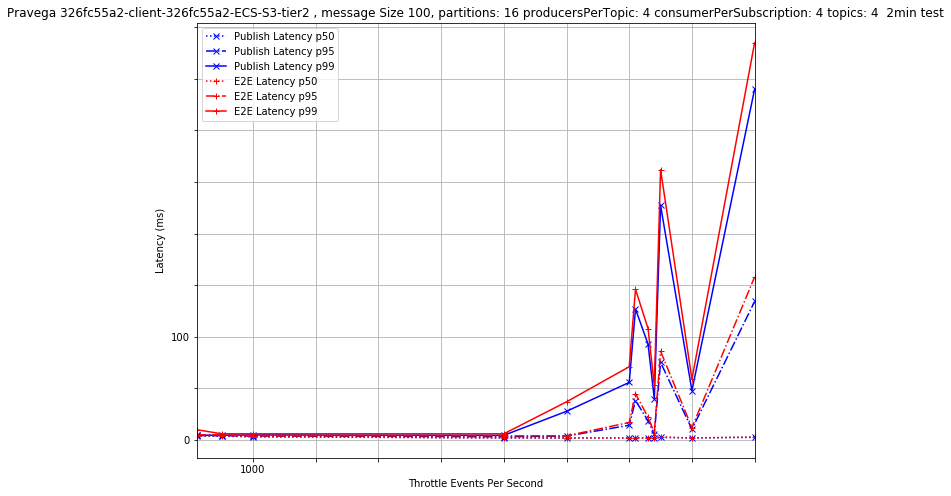

In [3275]:
plot_latency_vs_provided_rate_normal(filt_100_df)

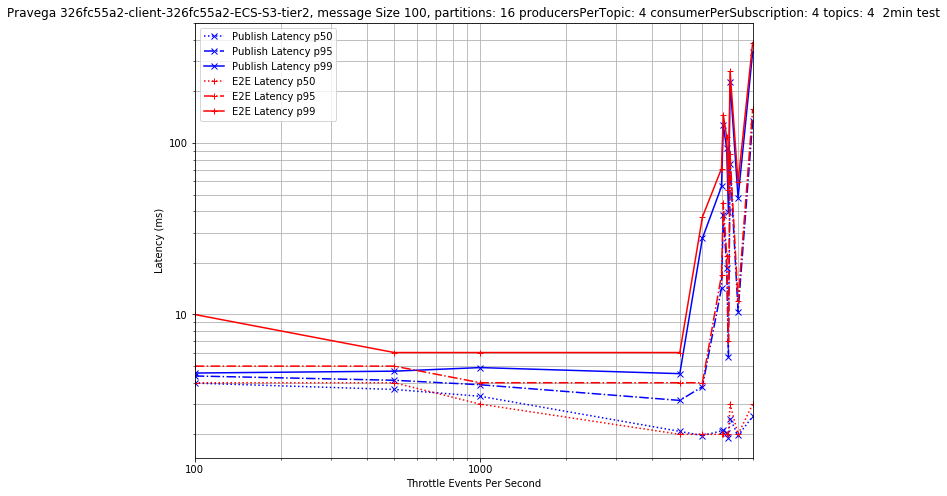

In [3276]:
plot_latency_vs_provided_rate(filt_100_df)

In [3277]:
latency_vs_provided_rate_table(filt_100_df)

,Publish Latency p50,Publish Latency p95,Publish Latency p99,E2E Latency p50,E2E Latency p95,E2E Latency p99,test_uuid
Throttle Events Per Second,,,,,,,
100.0,3.979,4.379,4.556,4.0,5.0,10.000,9a2239c0-bdb3-456d-b762-77906ca39ac9
500.0,3.655,4.134,4.672,4.0,5.0,6.000,6d953bf8-e9ba-4958-8b86-8f61f748ebdc
1000.0,3.334,3.892,4.902,3.0,4.0,6.000,c638ca03-1d81-4c7e-93e4-78c2b9eede40
5000.0,2.081,3.154,4.518,2.0,4.0,6.000,3eedd0f1-ef0d-4f92-a28c-173202d4f92b
6000.0,1.967,3.795,27.819,2.0,4.0,37.000,ba8937e0-f10d-4fd0-a4c3-d0dece3a2fb7
7000.0,2.095,14.275,55.801,2.0,17.0,71.000,efc32284-8fde-4a77-abdb-1485a0bae888
7100.0,2.107,38.251,126.916,2.0,45.0,146.000,76b717e7-1636-433d-890c-094797f21701
7300.0,2.031,18.654,92.955,2.0,22.0,108.000,6561cd30-0a0b-4e86-9cdd-64b507391fbb
7400.0,1.903,5.656,39.861,2.0,7.0,53.000,d2e62b28-0a8d-450d-8f30-5daa1c7aba79


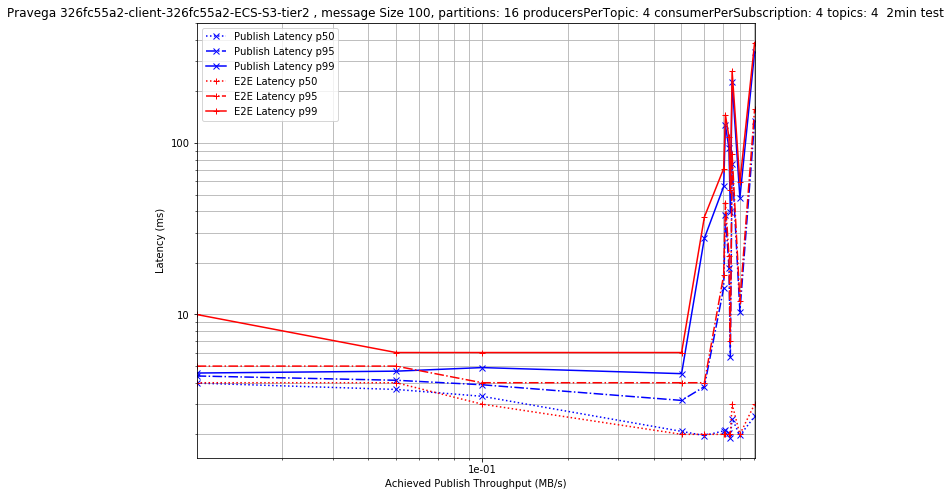

In [3278]:
plot_latency_vs_publish_throughput(filt_100_df)

In [3279]:
latency_vs_publish_throughput_table(filt_100_df)

,Publish Latency p50,Publish Latency p95,Publish Latency p99,E2E Latency p50,E2E Latency p95,E2E Latency p99,test_uuid
Achieved Publish Throughput (MB/s),,,,,,,
0.010017,3.979,4.379,4.556,4.0,5.0,10.000,9a2239c0-bdb3-456d-b762-77906ca39ac9
0.050081,3.655,4.134,4.672,4.0,5.0,6.000,6d953bf8-e9ba-4958-8b86-8f61f748ebdc
0.100159,3.334,3.892,4.902,3.0,4.0,6.000,c638ca03-1d81-4c7e-93e4-78c2b9eede40
0.500893,2.081,3.154,4.518,2.0,4.0,6.000,3eedd0f1-ef0d-4f92-a28c-173202d4f92b
0.601829,1.967,3.795,27.819,2.0,4.0,37.000,ba8937e0-f10d-4fd0-a4c3-d0dece3a2fb7
0.703424,2.095,14.275,55.801,2.0,17.0,71.000,efc32284-8fde-4a77-abdb-1485a0bae888
0.713339,2.107,38.251,126.916,2.0,45.0,146.000,76b717e7-1636-433d-890c-094797f21701
0.734182,2.031,18.654,92.955,2.0,22.0,108.000,6561cd30-0a0b-4e86-9cdd-64b507391fbb
0.742130,1.903,5.656,39.861,2.0,7.0,53.000,d2e62b28-0a8d-450d-8f30-5daa1c7aba79


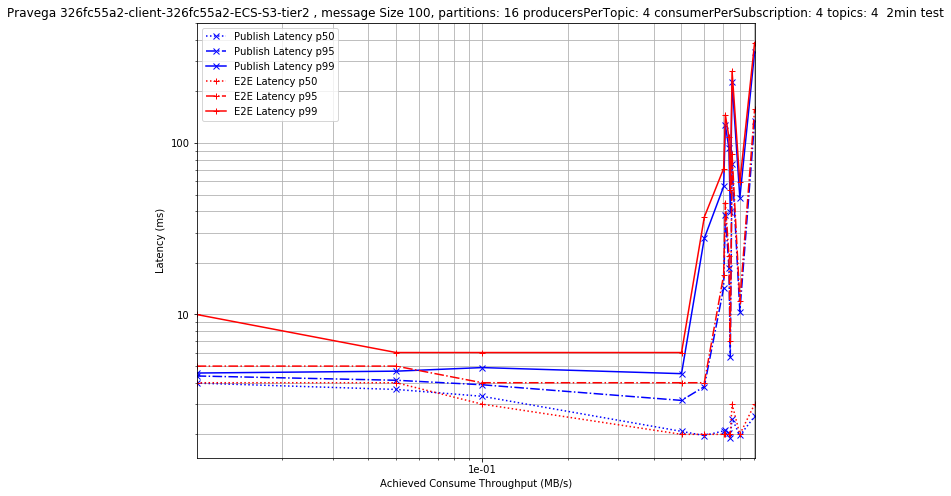

In [3280]:
plot_latency_vs_consume_throughput(filt_100_df)

In [3281]:
latency_vs_consume_throughput_table(filt_100_df)

,Publish Latency p50,Publish Latency p95,Publish Latency p99,E2E Latency p50,E2E Latency p95,E2E Latency p99,test_uuid
Achieved Consume Throughput (MB/s),,,,,,,
0.010011,3.979,4.379,4.556,4.0,5.0,10.000,9a2239c0-bdb3-456d-b762-77906ca39ac9
0.050090,3.655,4.134,4.672,4.0,5.0,6.000,6d953bf8-e9ba-4958-8b86-8f61f748ebdc
0.100172,3.334,3.892,4.902,3.0,4.0,6.000,c638ca03-1d81-4c7e-93e4-78c2b9eede40
0.500784,2.081,3.154,4.518,2.0,4.0,6.000,3eedd0f1-ef0d-4f92-a28c-173202d4f92b
0.601721,1.967,3.795,27.819,2.0,4.0,37.000,ba8937e0-f10d-4fd0-a4c3-d0dece3a2fb7
0.703429,2.095,14.275,55.801,2.0,17.0,71.000,efc32284-8fde-4a77-abdb-1485a0bae888
0.713247,2.107,38.251,126.916,2.0,45.0,146.000,76b717e7-1636-433d-890c-094797f21701
0.734184,2.031,18.654,92.955,2.0,22.0,108.000,6561cd30-0a0b-4e86-9cdd-64b507391fbb
0.742055,1.903,5.656,39.861,2.0,7.0,53.000,d2e62b28-0a8d-450d-8f30-5daa1c7aba79


## Message Size 10 KB

In [3311]:
filt_10000_df = filter_dataframe(
    filt_df,
    messageSize=10000,
    producersPerTopic=4,
    partitionsPerTopic=16,
    numWorkloadWorkers=4,
    #version='2.6.0-ecs-s3-tier2'
    #version='2.6.0-not-tiered'
    version='2.5.2',
    #version='0.8.0-2656.15b0f5eb9-no_netty-client-Isilon-tier2'
    #version='15b0f5eb9-no_netty-2b28b32-ECS-S3-tier2'
    #version='15b0f5eb9-no_netty-2b28b32-ECS-S3-tier2-test2'
)

In [3312]:
# View distinct sets of parameters.
# There should only be one distinct set of parameters.
filt_10000_df[param_cols].drop_duplicates().T

test_uuid,ca6c67ac-af4f-4cf7-aa22-223f7cf775af
numWorkloadWorkers,4
topics,4
partitionsPerTopic,16
producersPerTopic,4
subscriptionsPerTopic,1
consumerPerSubscription,4
testDurationMinutes,2
keyDistributor,NO_KEY
git_commit,1793eb2
driverName,Pulsar


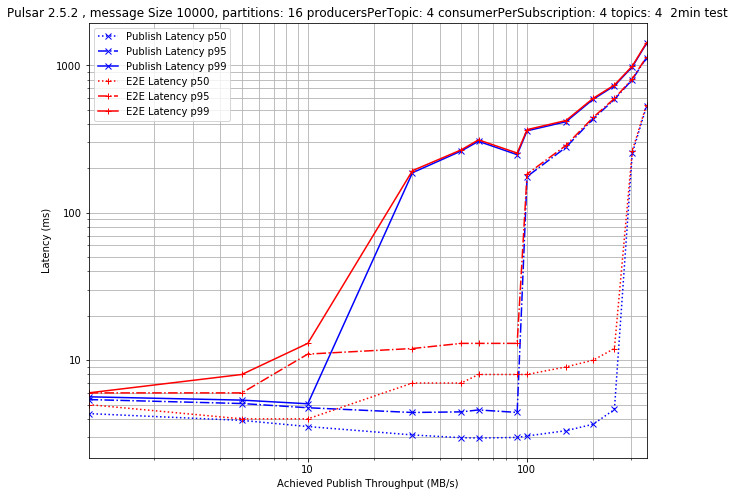

In [3313]:
plot_latency_vs_publish_throughput(filt_10000_df)

In [3314]:
latency_vs_publish_throughput_table(filt_10000_df)

,Publish Latency p50,Publish Latency p95,Publish Latency p99,E2E Latency p50,E2E Latency p95,E2E Latency p99,test_uuid
Achieved Publish Throughput (MB/s),,,,,,,
1.001524,4.342,5.407,5.644,5.000,6.000,6.000,ca6c67ac-af4f-4cf7-aa22-223f7cf775af
5.007182,3.906,5.082,5.360,4.000,6.000,8.000,df8f8deb-1867-470b-9dd2-4217c8bd066a
10.015204,3.548,4.758,5.062,4.000,11.000,13.000,6ae69153-73f9-49c8-b90b-bca6143c53ea
30.071285,3.112,4.418,186.769,7.000,12.000,193.000,93243c90-c285-4e1b-bd1a-2fcc3bd775c9
50.198071,2.980,4.461,262.385,7.000,13.000,267.001,bd0e7cdb-fb2f-4253-ad97-cf8cb0dcad96
60.167171,2.965,4.597,304.993,8.000,13.000,312.001,03a1e4b7-e9d4-4ee8-8e78-069addb961f6
90.299369,2.993,4.423,247.554,8.000,13.000,254.000,b988c948-f418-4a87-b07d-f7ce41e78f0e
100.210112,3.061,175.947,359.463,8.000,183.000,366.001,d31878db-30ba-47e0-bb58-77990b8bc44b
150.711223,3.324,277.799,414.025,9.000,286.001,422.001,67d39703-4661-40c4-8709-645539534c70


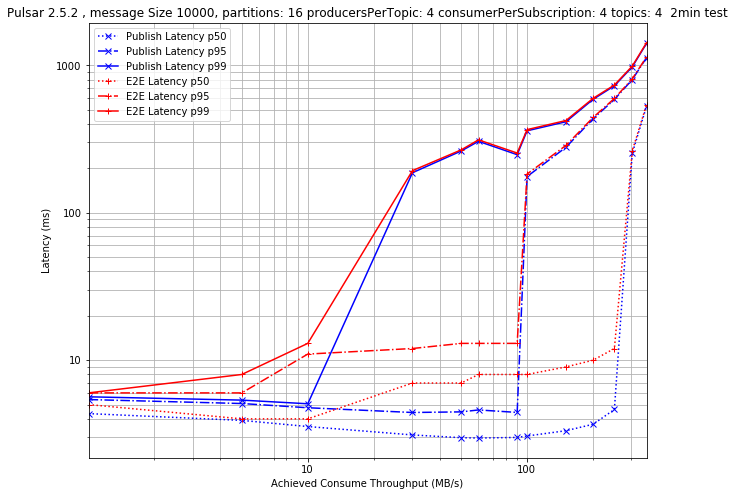

In [3315]:
plot_latency_vs_consume_throughput(filt_10000_df)

In [3316]:
latency_vs_consume_throughput_table(filt_10000_df)

,Publish Latency p50,Publish Latency p95,Publish Latency p99,E2E Latency p50,E2E Latency p95,E2E Latency p99,test_uuid
Achieved Consume Throughput (MB/s),,,,,,,
1.001524,4.342,5.407,5.644,5.000,6.000,6.000,ca6c67ac-af4f-4cf7-aa22-223f7cf775af
5.007182,3.906,5.082,5.360,4.000,6.000,8.000,df8f8deb-1867-470b-9dd2-4217c8bd066a
10.014791,3.548,4.758,5.062,4.000,11.000,13.000,6ae69153-73f9-49c8-b90b-bca6143c53ea
30.071204,3.112,4.418,186.769,7.000,12.000,193.000,93243c90-c285-4e1b-bd1a-2fcc3bd775c9
50.199304,2.980,4.461,262.385,7.000,13.000,267.001,bd0e7cdb-fb2f-4253-ad97-cf8cb0dcad96
60.170807,2.965,4.597,304.993,8.000,13.000,312.001,03a1e4b7-e9d4-4ee8-8e78-069addb961f6
90.302830,2.993,4.423,247.554,8.000,13.000,254.000,b988c948-f418-4a87-b07d-f7ce41e78f0e
100.213349,3.061,175.947,359.463,8.000,183.000,366.001,d31878db-30ba-47e0-bb58-77990b8bc44b
150.714018,3.324,277.799,414.025,9.000,286.001,422.001,67d39703-4661-40c4-8709-645539534c70


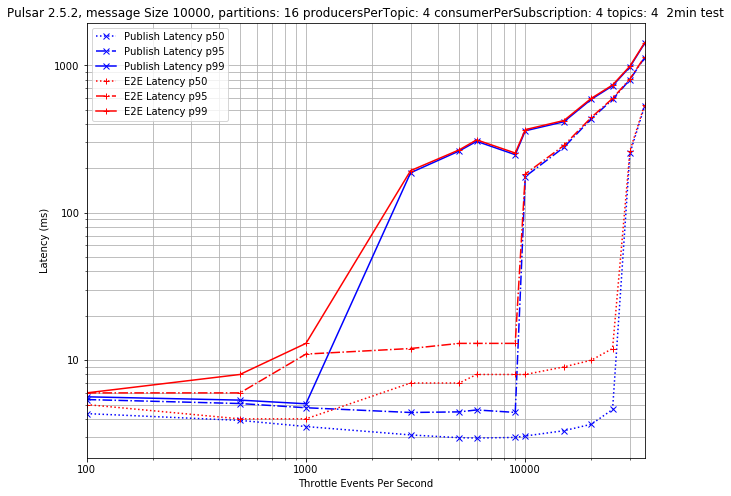

In [3317]:
plot_latency_vs_provided_rate(filt_10000_df)

In [3318]:
latency_vs_provided_rate_table(filt_10000_df)

,Publish Latency p50,Publish Latency p95,Publish Latency p99,E2E Latency p50,E2E Latency p95,E2E Latency p99,test_uuid
Throttle Events Per Second,,,,,,,
100.0,4.342,5.407,5.644,5.000,6.000,6.000,ca6c67ac-af4f-4cf7-aa22-223f7cf775af
500.0,3.906,5.082,5.360,4.000,6.000,8.000,df8f8deb-1867-470b-9dd2-4217c8bd066a
1000.0,3.548,4.758,5.062,4.000,11.000,13.000,6ae69153-73f9-49c8-b90b-bca6143c53ea
3000.0,3.112,4.418,186.769,7.000,12.000,193.000,93243c90-c285-4e1b-bd1a-2fcc3bd775c9
5000.0,2.980,4.461,262.385,7.000,13.000,267.001,bd0e7cdb-fb2f-4253-ad97-cf8cb0dcad96
6000.0,2.965,4.597,304.993,8.000,13.000,312.001,03a1e4b7-e9d4-4ee8-8e78-069addb961f6
9000.0,2.993,4.423,247.554,8.000,13.000,254.000,b988c948-f418-4a87-b07d-f7ce41e78f0e
10000.0,3.061,175.947,359.463,8.000,183.000,366.001,d31878db-30ba-47e0-bb58-77990b8bc44b
15000.0,3.324,277.799,414.025,9.000,286.001,422.001,67d39703-4661-40c4-8709-645539534c70


## Analyze 100 B events, 50,000 events/sec, various number of partitions and producers

In [3319]:
filt_50000eps_df = filter_dataframe(
    filt_df,
    messageSize=100,
    producerRate=-1,
).sort_values(['endToEndLatencyMs99Pct'], ascending=True)
len(filt_50000eps_df)

filter_dataframe: No matching records after filtering on producerRate=[-1]


0

In [3320]:
take_varying_columns(filt_50000eps_df[cols]).head(20)

""
test_uuid


# Analyze Latency Distribution

In [3310]:
test_uuid = filt_50000eps_df.iloc[0].name
test_uuid

IndexError: single positional indexer is out-of-bounds

In [2969]:
df = clean_df
t = df[df.test_uuid==test_uuid].iloc[0]

IndexError: single positional indexer is out-of-bounds

In [2970]:
# Cumulative Distribution Function
pubcdf = t.aggregatedPublishLatencyQuantiles
pubcdf.name = 'Publish Latency CDF'

In [2971]:
# Probability Distribution Function (latency histogram)
pubpdf = pd.Series(index=pubcdf.index, data=np.gradient(pubcdf, pubcdf.index.values), name='Publish Latency PDF')

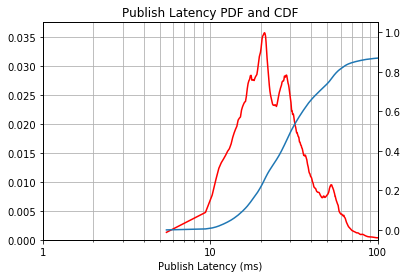

In [2972]:
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
pubpdf.plot(ax=ax0, xlim=[1,100], ylim=[0,None], style='r', title='Publish Latency PDF and CDF')
pubcdf.plot(ax=ax1, xlim=[1,100], secondary_y=True, logx=True, ylim=[0,1])
# ax0.set_ylabel('PDF');
# ax1.set_ylabel('CDF');
ax0.set_xlabel('Publish Latency (ms)');
tick_formatter = matplotlib.ticker.LogFormatter()
ax0.xaxis.set_major_formatter(tick_formatter)
ax0.grid('on', which='both', axis='both')
plt.show()
plt.close()

In [2973]:
# Cumulative Distribution Function
e2ecdf = t.aggregatedEndToEndLatencyQuantiles
e2ecdf.name = 'E2E Latency CDF'
# Probability Distribution Function (latency histogram)
e2epdf = pd.Series(index=e2ecdf.index, data=np.gradient(e2ecdf, e2ecdf.index.values), name='E2E Latency PDF')

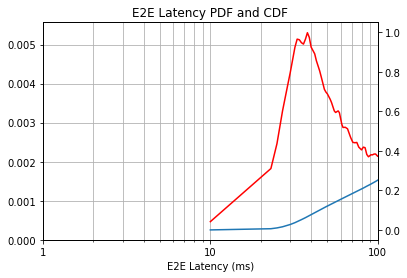

In [2974]:
fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()
e2epdf.plot(ax=ax0, xlim=[1,100], ylim=[0,None], style='r', title='E2E Latency PDF and CDF')
e2ecdf.plot(ax=ax1, xlim=[1,100], secondary_y=True, logx=True, ylim=[0,1])
# ax0.set_ylabel('PDF');
# ax1.set_ylabel('CDF');
ax0.set_xlabel('E2E Latency (ms)');
tick_formatter = matplotlib.ticker.LogFormatter()
ax0.xaxis.set_major_formatter(tick_formatter)
ax0.grid('on', which='both', axis='both')
plt.show()
plt.close()

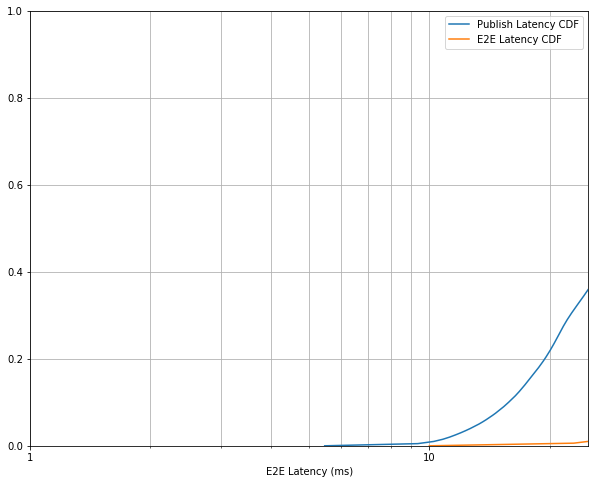

In [2975]:
# Combined publish and E2E latency CDF
fig0, ax0 = plt.subplots()
xlim=[1,25]
pubcdf.plot(ax=ax0, xlim=xlim, logx=True, ylim=[0,1], legend=True, figsize=(10,8))
e2ecdf.plot(ax=ax0, xlim=xlim, logx=True, ylim=[0,1], legend=True)
ax0.set_xlabel('E2E Latency (ms)');
tick_formatter = matplotlib.ticker.LogFormatter()
ax0.xaxis.set_major_formatter(tick_formatter)
ax0.grid('on', which='both', axis='both')
plt.show()
plt.close()

## Compare Two Sets

In [3136]:
# Common filter
filt_df = filter_dataframe(
    clean_df,
    numWorkloadWorkers=4, 
    topics=4,
    testDurationMinutes=2,
    #size_of_test_batch=(2,1000), # between
    #aggregatedEndToEndLatency50pct=(1,1e6),
    messageSize=10000,
    producersPerTopic=4,
    partitionsPerTopic=16,    
)
len(filt_df)

64

In [3147]:
# Set 1
filt1_df = filter_dataframe(
    filt_df,
    #version='2.6.0-not-tiered',
    #version='15b0f5eb9-no_netty-2b28b32-ECS-S3-tier2',
    #pravegaVersion='15b0f5eb9-no_netty-2b28b32-ECS-S3-tier2-test2',  
    pravegaVersion='0.8.0-2656.15b0f5eb9-no_netty-client-Isilon-tier2' 
    #pravegaVersion='0.8.0-2656.1c40f1e-Isilon-tier2',
)
len(filt1_df)

13

In [3148]:
# Set 2
filt2_df = filter_dataframe(
    filt_df,
    #version='2.6.0-ecs-s3-tier2'
    version='2.5.2',
    #pravegaVersion='0.8.0-2656.1c40f1e-Isilon-tier2',
    #version='15b0f5eb9-no_netty-2b28b32-ECS-S3-tier2',
    #pravegaVersion='0.8.0-2656.15b0f5eb9-no_netty-client-Isilon-tier2'
)
len(filt2_df)

13

In [3149]:
dfs = [filt1_df, filt2_df]
take_varying_columns(pd.concat(dfs)[param_cols]).drop_duplicates()

,git_commit,driverName,version
test_uuid,,,
d3e554c7-d832-4862-b17a-bf37f782c083,88dbf86,Pravega,0.8.0-2656.15b0f5eb9-no_netty-client-Isilon-tier2
ca6c67ac-af4f-4cf7-aa22-223f7cf775af,1793eb2,Pulsar,2.5.2


In [3150]:
def plot_latency_vs_throughput_comparison(dfs, legend_cols=None, latencyMetric='Publish'):
    fig0, ax0 = plt.subplots()
    cmap = plt.get_cmap('Set1')
    colors = cmap.colors[0:len(dfs)]
    pravegaVersion = filt1_df.version.iloc[0]
    pravegaDriver = filt1_df.driver.iloc[0]
    pulsarVersion = filt2_df.version.iloc[0]
    pulsaraDriver = filt2_df.driver.iloc[0]
    messageSize = filt2_df.messageSize.iloc[0]
    msgSize = '%db' % (messageSize)
    if messageSize >= 1000:
        msgSize = '%dk' % (messageSize/1000)
    
    partitionsPerTopic = filt2_df.partitionsPerTopic.iloc[0]
    testDurationMinutes = filt2_df.testDurationMinutes.iloc[0]
    topics = filt2_df.topics.iloc[0]
    producersPerTopic = filt2_df.producersPerTopic.iloc[0]
    consumerPerSubscription = filt2_df.consumerPerSubscription.iloc[0]
    
    title = 'Compare %s %s and %s %s [messageSize %s, partitions: %d producersPerTopic: %d consumerPerSubscription: %d topics: %d] on %d min test' % (pravegaDriver, pravegaVersion, pulsaraDriver, pulsarVersion, msgSize, partitionsPerTopic, producersPerTopic, consumerPerSubscription, topics, testDurationMinutes)
   
    for index, (df, color) in enumerate(zip(dfs, colors)):
        df = df.set_index(['publishRateMBPerSecMean']).sort_index()
        name_cols = df.iloc[0][legend_cols]
        name = ','.join(['%s=%s' % item for item in name_cols.to_dict().items()])
    
        plot_df = latency_vs_provided_rate_table(df)
        
        for percentile, style in [('50',':x'), ('95','-.x'), ('99','-x')]:
            plot_df = df[['aggregated%sLatency%spct' % (latencyMetric, percentile)]]
            plot_df.columns = ['%s %s Latency p%s' % (name, latencyMetric, percentile)]
            plot_df.index.name = 'Achieved Publish Throughput (MB/s)'
            plot_df.plot(
                ax=ax0,
                logx=True, 
                logy=True,
                figsize=(10,8),
                grid=True,
                style=style,
                color=color,
                title=title 
            )
    ax0.set_ylabel('Latency (ms)');
    tick_formatter = matplotlib.ticker.LogFormatter()
    ax0.xaxis.set_major_formatter(tick_formatter)
    ax0.yaxis.set_major_formatter(tick_formatter)
    ax0.grid('on', which='both', axis='both')

In [3151]:
def plot_latency_vs_provided_rate_comparison(dfs, legend_cols=None, latencyMetric='Publish'):
    fig0, ax0 = plt.subplots()
    cmap = plt.get_cmap('Set1')
    colors = cmap.colors[0:len(dfs)]
    pravegaVersion = filt1_df.version.iloc[0]
    pravegaDriver = filt1_df.driver.iloc[0]
    pulsarVersion = filt2_df.version.iloc[0]
    pulsaraDriver = filt2_df.driver.iloc[0]
    messageSize = filt2_df.messageSize.iloc[0]
    msgSize = '%db' % (messageSize)
    if messageSize >= 1000:
        msgSize = '%dk' % (messageSize/1000)
    
    partitionsPerTopic = filt2_df.partitionsPerTopic.iloc[0]
    testDurationMinutes = filt2_df.testDurationMinutes.iloc[0]
    topics = filt2_df.topics.iloc[0]
    producersPerTopic = filt2_df.producersPerTopic.iloc[0]
    consumerPerSubscription = filt2_df.consumerPerSubscription.iloc[0]
    
    title = 'Compare %s %s and %s %s [messageSize %s, partitions: %d producersPerTopic: %d consumerPerSubscription: %d topics: %d] on %d min test' % (pravegaDriver, pravegaVersion, pulsaraDriver, pulsarVersion, msgSize, partitionsPerTopic, producersPerTopic, consumerPerSubscription, topics, testDurationMinutes)
    
    for index, (df, color) in enumerate(zip(dfs, colors)):
        df = df.set_index(['throttleEventsPerSec']).sort_index()
        name_cols = df.iloc[0][legend_cols]
        name = ','.join(['%s=%s' % item for item in name_cols.to_dict().items()])
               
        for percentile, style in [('50',':x'), ('95','-.x'), ('99','-x')]:
            plot_df = df[['aggregated%sLatency%spct' % (latencyMetric, percentile)]]
            plot_df.columns = ['%s %s Latency p%s' % (name, latencyMetric, percentile)]
            plot_df.index.name = 'Provided Rate (Events/s)'
            plot_df.plot(
                ax=ax0,
                logx=True, 
                logy=True,
                figsize=(10,8),
                grid=True,
                style=style,
                color=color,
                title=title 
            )
    ax0.set_ylabel('Latency (ms)');
    tick_formatter = matplotlib.ticker.LogFormatter()
    ax0.xaxis.set_major_formatter(tick_formatter)
    ax0.yaxis.set_major_formatter(tick_formatter)
    ax0.grid('on', which='both', axis='both')

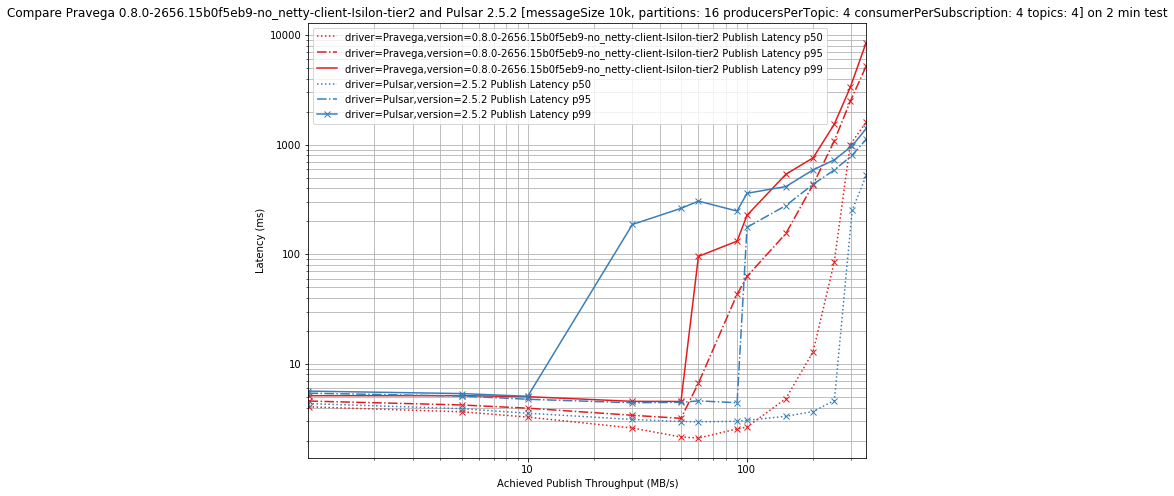

In [3152]:
plot_latency_vs_throughput_comparison([filt1_df, filt2_df], legend_cols=['driver', 'version'], latencyMetric='Publish')

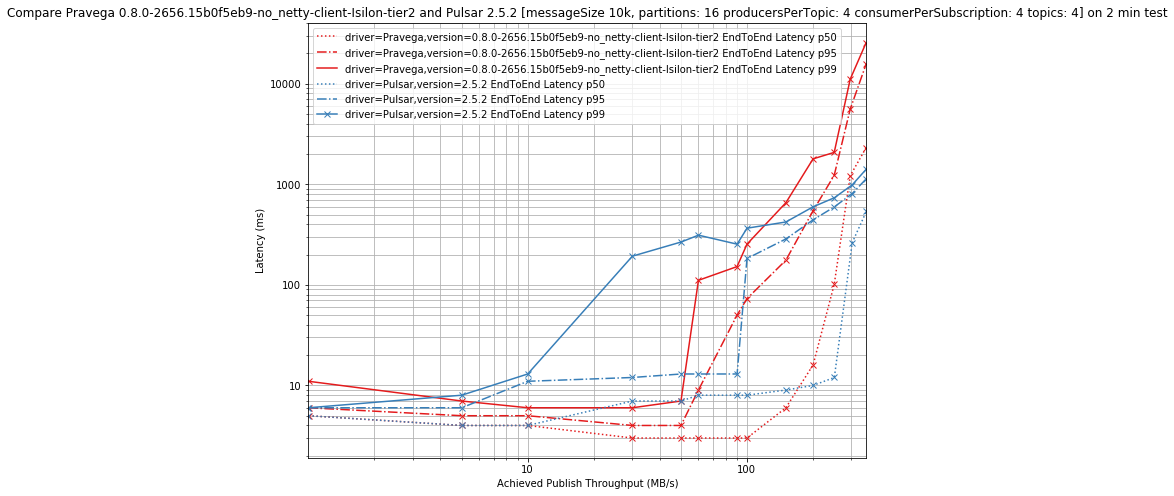

In [3153]:
plot_latency_vs_throughput_comparison([filt1_df, filt2_df], legend_cols=['driver', 'version'], latencyMetric='EndToEnd')

In [3154]:
### Latency vs Provided Rate 

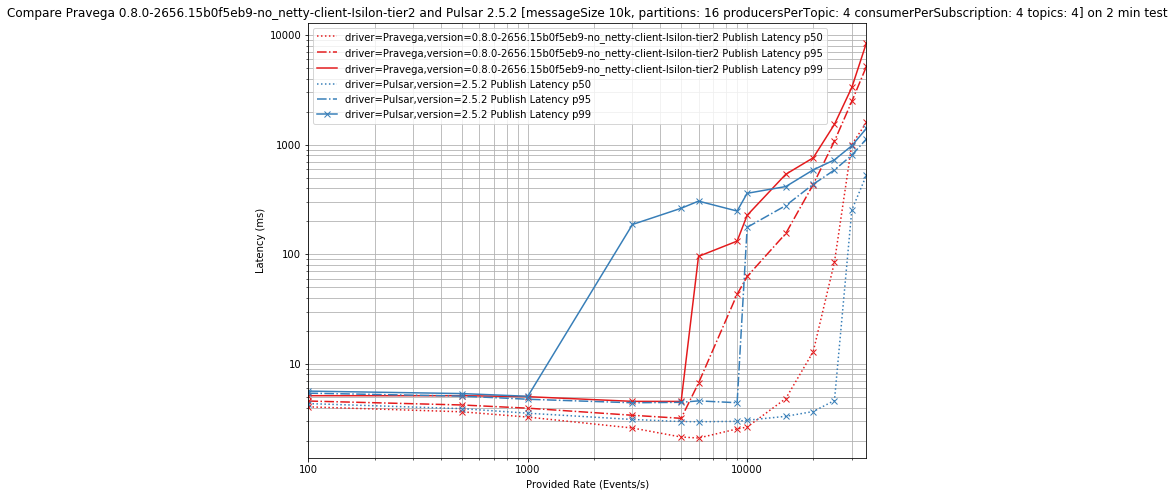

In [3155]:
plot_latency_vs_provided_rate_comparison([filt1_df, filt2_df], legend_cols=['driver', 'version'], latencyMetric='Publish')

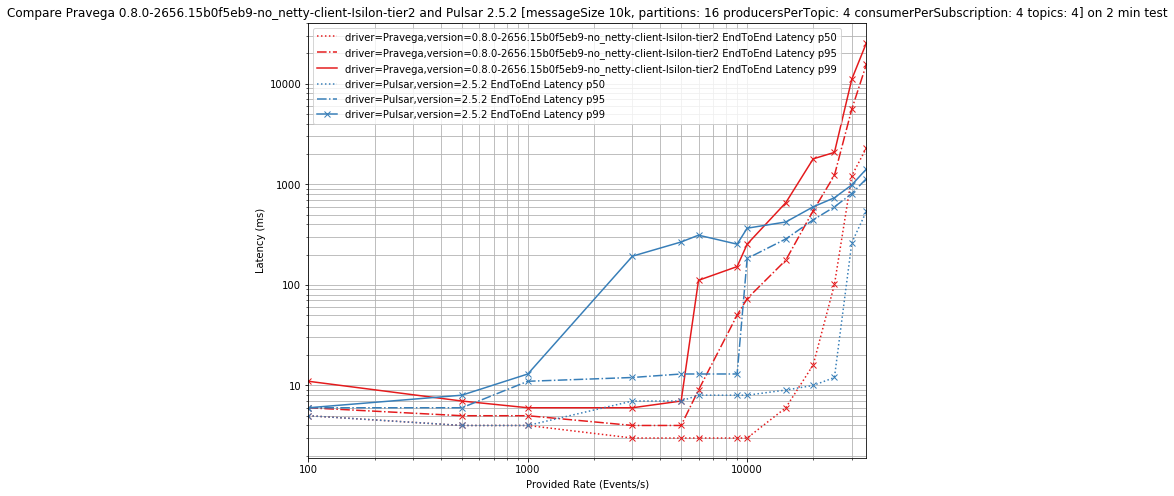

In [3156]:
plot_latency_vs_provided_rate_comparison([filt1_df, filt2_df], legend_cols=['driver', 'version'], latencyMetric='EndToEnd')